<a href="https://colab.research.google.com/github/Vixuz144/Simulaci-n-2/blob/main/SyE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El problema de las serpientes y escaleras. Un juego que me atormentó toda mi infancia ya que me acusaban de hacer trampa (al inicio con justa razón y luego, cuando jugaba correctamente, ya nadie quería jugar conmigo). Además de que en cada una de las casas de mis tí@s se jugaba de manera diferente, por lo que cuando iba con algún(a) tí@ me decían que no sabia jugar por no jugar con sus reglas. :'(

Vamos a considerar el siguiente tablero

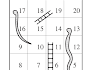

#***Solución Analítica***

Por lo que para la solución analítica primero consideremos que se va ajugar con un dado equilibrado de 6 caras. Los valores numéricos (puntos) del dado representa la cantidad de casillas que el jugador va a avanzar en el tablero. Para iniciar el juego se coloca la ficha del jugador fuera del tablero y para ganar se tiene que llegar hasta la última casilla, en este caso la casilla 20.


De las $20$ casillas no se puede permanecer en $4$ casillas (3, 13 15, 17) ya que al caer en estas automaticamente subes (por una escalera) o bajas (por una serpiente). Por ello hay $20 - 4 = 16$ casillas en las que puedes permanecer hasta el siguiente turno.

Al analizar el estado inicial, el turno cero $(t_0)$ se tiene la siguiente función de probabilidad para el dado:

$$ f(x) =  \left\{ \begin{array}{cl} \frac{1}{6} & \textrm{si } x \in \left\{ 1, 2, 3, 4, 5, 6 \right\}\\ \\ 0 & \textrm{en otro caso} \end{array} \right. $$

Y analizando la ultima casilla, en el último turno, se sabe que pudo estar en las casillas 19, 18, 17, 16, 15, 14. Sin embargo no consideramos las serpientes y escaleras. Por lo que al caer en la casilla 17 la serpiente nos baja a la casilla 10. Mientras qeu si se cae en la casilla 15 la escalera nos sube a la casilla 19.

Por lo que si nos encontramos en la casilla 20, no podemos haber estado en la casilla 17 ni en la 15, con lo que solo pudo estar en las casillas 19, 18, 16, 14.

Sean:

$\qquad \quad c_i:$ la probabilidad de estar en la casilla $i = {1, 2, ..., 20}$;

$\qquad \quad c_{i|j}:$ la probabilidad de estar en la casilla $i = {1, 2, ..., 20}$ dado a que se estuvo en el anterior turno en la casilla $j = {1, 2, ..., 20}$

$$⇒ c_{20} = c_{20|19}*c_{19} + c_{20|18}*c_{18} + c_{20|16}*c_{16} + c_{20|14}*c_{14}$$

$$ c_{20} = \frac{1}{4}c_{19} + \frac{1}{4}c_{18} + \frac{1}{4}c_{16} + \frac{1}{4}c_{14} $$


Sin ambargo, la expresion anterior esta obviando los valores de las probabilidades condicionales iguales a cero, las cuales son el resto de 11 casillas posibles.

Ahora, se va a analizar un caso con escaleras, por ejemplo la casilla 19.

Para estar en esta casilla, en las anteriores casillas se pudo estar en las casillas 18, 16 o 14 sin considerar la escalera.

Al considerar la escalera, seria como considerar aquellas que lleguen a 15, es decir, considerar las casillas 14, 12, 11, 10, 9. De esta manera:

$$ c_{19} = c_{19|18}*c_{18} + c_{19|16}*c_{16} + ... + c_{19|1}*c_{1} + c_{19|0}*c_{0} $$

$$ c_{19} = \frac{1}{4}c_{18} + \frac{1}{4}c_{16} + \frac{1}{4} c_{14} + \frac{1}{4 * 5}c_{14} + \frac{1}{4 * 5}c_{12} + \frac{1}{4 * 5}c_{11} + \frac{1}{4 * 5}c_{10} + \frac{1}{4 * 5}c_{9} $$

$$ c_{19} = \frac{1}{4}c_{18} + \frac{1}{4}c_{16} + \frac{1}{4} c_{14} + \frac{1}{20}c_{14} + \frac{1}{20}c_{12} + \frac{1}{20}c_{11} + \frac{1}{20}c_{10} + \frac{1}{20}c_{9} $$

$$ c_{19} = \frac{1}{4}c_{18} + \frac{1}{4}c_{16} + \frac{6}{20}c_{14} + \frac{1}{20}c_{12} + \frac{1}{20}c_{11} + \frac{1}{20}c_{10} + \frac{1}{20}c_{9} $$

Si se continua analizando cada caso con cada casilla, se puede obtener un sistema de ecuaciones. $C = AC$. Donde:

$$ A = \left[ \begin{array}{} 0 & \frac{1}{4} & \frac{1}{4} & \frac{1}{4} & \frac{1}{4} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & \frac{1}{4} & \frac{1}{4} & \frac{3}{10} & \frac{1}{20} & \frac{1}{20} & \frac{1}{20} & \frac{1}{20} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & \frac{1}{3} & \frac{1}{3} & \frac{1}{3} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & \frac{1}{4} & \frac{1}{4} & \frac{1}{4} & \frac{1}{4} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & \frac{1}{5} & \frac{1}{5} & \frac{1}{5} & \frac{1}{5} & \frac{1}{5} & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & \frac{1}{6} & \frac{1}{6} & \frac{1}{6} & \frac{1}{6} & \frac{1}{6} & \frac{1}{6} & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & \frac{1}{7} & \frac{1}{7} & \frac{1}{7} & \frac{1}{7} & \frac{1}{7} & \frac{1}{7} & 0 & \frac{1}{21} & \frac{1}{21} & \frac{1}{21}\\
0 & 0 & \frac{1}{28} & \frac{1}{28} & \frac{1}{28} & \frac{1}{28} & 0 & 0 & \frac{1}{7} & \frac{1}{7} & \frac{1}{7} & \frac{1}{7} & \frac{1}{7} & \frac{1}{7} & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \frac{1}{5} & \frac{1}{5} & \frac{1}{5} & \frac{1}{5} & \frac{1}{5} & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \frac{1}{5} & \frac{1}{5} & \frac{1}{5} & \frac{1}{5} & \frac{1}{5} & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \frac{1}{5} & \frac{1}{5} & \frac{1}{5} & \frac{1}{5} & \frac{1}{5} & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \frac{1}{5} & \frac{1}{5} & \frac{1}{5} & \frac{1}{5} & \frac{1}{5}\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \frac{1}{4} & \frac{1}{4} & \frac{1}{4} & \frac{1}{4}\\
0 & 0 & 0 & 0 & 0 & \frac{1}{24} & \frac{1}{24} & \frac{1}{24} & \frac{1}{24} & \frac{1}{24} & \frac{1}{24} & 0 & 0 & 0 & \frac{1}{4} & \frac{1}{4} & \frac{1}{4}\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \frac{1}{2} & \frac{1}{2}\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\ \end{array} \right] $$

$$ C = \left[ c_{20} \quad c_{19} \quad c_{18} \quad c_{16} \quad c_{14} \quad c_{12} \quad c_{11} \quad c_{10} \quad c_{9} \quad c_{8} \quad c_{7} \quad c_{6} \quad c_{5} \quad c_{4} \quad c_{2} \quad c_{1} \quad c_{0} \right] $$

In [ ]:
import numpy.linalg  as la
A = [[0, 1/4, 1/4, 1/4, 1/4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 1/4, 1/4, 3/10, 1/20, 1/20, 1/20, 1/20, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1/3, 1/3, 1/3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 1/4, 1/4, 1/4, 1/4, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 1/5, 1/5, 1/5, 1/5, 1/5, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 1/6, 1/6, 1/6, 1/6, 1/6, 1/6, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 1/7, 1/7, 1/7, 1/7, 1/7, 1/7, 0, 1/21, 1/21, 1/21],
     [0, 0, 1/28, 1/28, 1/28, 1/28, 0, 0, 1/7, 1/7, 1/7, 1/7, 1/7, 1/7, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 1/5, 1/5, 1/5, 1/5, 1/5, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1/5, 1/5, 1/5, 1/5, 1/5, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1/5, 1/5, 1/5, 1/5, 1/5, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1/5, 1/5, 1/5, 1/5, 1/5],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1/4, 1/4, 1/4, 1/4],
     [0, 0, 0, 0, 0, 1/24, 1/24, 1/24, 1/24, 1/24, 1/24, 0, 0, 0, 1/4, 1/4, 1/4],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1/2, 1/24],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     ]
eval, evec = la.eig(A)
n = len(eval)
for i in range(n):
  print(eval[i])
  print(evec[i],'\n')


In [ ]:
import numpy as np
a = True
i = 1

# print(np.allclose(np.array([1, 2]), np.array([1, 2])))
while a:
  aa = la.matrix_power(A, i)
  aaa = la.matrix_power(A, i+1)
  a = not np.allclose(aa, aaa)
  i += 1
# print(aa)
print(i)
eval, evec = la.eig(aa)
n = len(eval)
for i in range(n):
  print(eval[i])
  print(evec[i],'\n')


In [85]:
i = 1
a = True
c = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
# while a:
#   aa = la.matrix_power(A, i)
#   aaa = np.dot(aa, c)
#   a = not np.allclose(c, aaa)
#   i += 1
for i in range(1,50):
  aa = la.matrix_power(A, i)
  print(np.round(np.dot(aa, c), 5),'\n')

[0.      0.      0.      0.      0.      0.00694 0.00694 0.00694 0.00694
 0.00694 0.00694 0.      0.03333 0.075   0.11667 0.2     0.29028] 

[0.      0.      0.00025 0.00025 0.00025 0.00337 0.00428 0.00527 0.00627
 0.00766 0.00904 0.00731 0.00615 0.01349 0.03019 0.08714 0.23228] 

[0.      0.      0.00019 0.00027 0.00033 0.00094 0.00124 0.00185 0.00254
 0.00379 0.00527 0.00652 0.00742 0.00835 0.00992 0.02348 0.09497] 

[0.000e+00 0.000e+00 7.000e-05 1.300e-04 2.000e-04 6.100e-04 6.400e-04
 8.200e-04 1.010e-03 1.520e-03 2.210e-03 2.920e-03 4.070e-03 5.740e-03
 7.120e-03 1.132e-02 2.920e-02] 

[0.000e+00 0.000e+00 3.000e-05 5.000e-05 8.000e-05 3.600e-04 4.100e-04
 5.000e-04 5.900e-04 7.900e-04 1.060e-03 1.260e-03 1.740e-03 2.670e-03
 3.810e-03 7.070e-03 1.468e-02] 

[0.00e+00 0.00e+00 2.00e-05 3.00e-05 4.00e-05 1.70e-04 2.00e-04 2.60e-04
 3.20e-04 4.40e-04 5.80e-04 6.80e-04 8.70e-04 1.25e-03 1.74e-03 3.49e-03
 8.60e-03] 

[0.00e+00 0.00e+00 1.00e-05 2.00e-05 2.00e-05 8.00e-05 9.00e-05 1.

#***Simulación***

In [1]:
import numpy  as np
from random import random, randint
from numba import jit
import matplotlib.pyplot as plt

In [2]:
# @jit(nopython = True)
def tablero(t = 100, d = 6, s = {98:78, 95:75, 93:73, 87:24, 64:60, 62:19, 56:53, 49:11, 48:26, 16:6}, e = {1:38, 4:14, 9:31, 21:42, 28:84, 36:44, 51:67, 71:91, 60:10}):
  pos = 0
  l = 0
  lp = [pos]
  ll = [l]
  while pos < t:
    pos += randint(1,d)
    l+=1
    lp.append(pos)
    ll.append(l)
    if pos in s.keys():
      pos = s[pos]
      lp.append(pos)
      ll.append(l)
    elif pos in e.keys():
      pos = e[pos]
      lp.append(pos)
      ll.append(l)
  return lp, ll, l

[0, 5, 8, 9, 10, 16, 18, 19, 7, 10, 16, 21, 9, 12, 15, 17, 23, 28, 34]


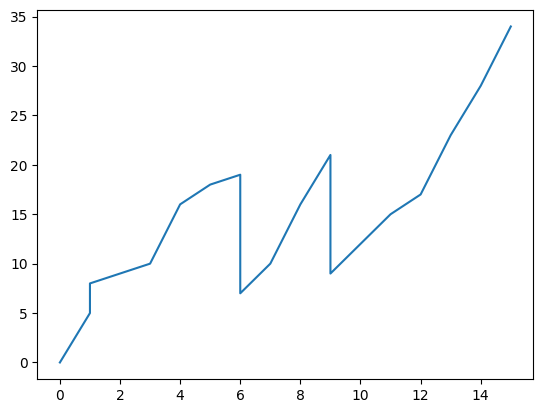

In [3]:
serpientes = {27:1, 21:9, 19:7}
escaleras = {3:22, 20:29, 5:8}

p, l, n = tablero(30, 6, serpientes, escaleras)
print(p)
plt.plot(l,p)
plt.show()

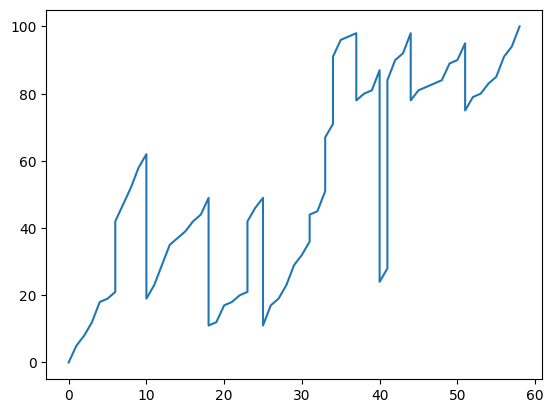

In [4]:
e = {1:38,
     4:14,
     9:31,
     21:42,
     28:84,
     36:44,
     51:67,
     71:91,
     60:100}
s = {98:78,
     95:75,
     93:73,
     87:24,
     64:60,
     62:19,
     56:53,
     49:11,
     48:26,
     16:6}

pos, lanz, n = tablero(s = s, e = e)
plt.plot(lanz,pos)
plt.show()

In [86]:
# @jit(nopython = True)
def rep(t, d, s, e, n = 10**4):
  l = []
  for i in range(n):
    c = tablero(s = s, e = e)[-1]
    l.append(c)
  return l

In [6]:
for i in range(19):
  l = rep(100, 6, s, e, 10**5)
  print(np.mean(l))

53.54826
53.5932
53.70977
53.62587
53.71769
54.00732
53.59457
53.80668
53.6727
53.89153
53.76199
53.62335
53.75359
53.63118
53.77125
53.7035
53.95563
53.65299
53.8298


In [87]:
sc = {17:10, 13:4}
ec = {15:19, 3:11}

for i in range(7):
  l = rep(20, 6, sc, ec, 10**6)
  print(np.mean(l))

29.835102
29.826971
29.833362
29.8342
29.832409
29.837309
29.84061
